In [20]:
import pyforest

In [21]:
data = pd.read_csv('C:/Users/strms/Downloads/Compressed/archive_2/ds_salaries.csv')

<IPython.core.display.Javascript object>

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [23]:
data.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [24]:
categorical_feature = data.select_dtypes(include=['object']).columns.tolist()
print(categorical_feature)

['experience_level', 'employment_type', 'job_title', 'salary_currency', 'employee_residence', 'company_location', 'company_size']


In [25]:
print('Number of missing data in the dataset:', data.isnull().sum())

print(00000000000000000000000000000000000000)

print('Number of unique values in columns:',data.nunique())

Number of missing data in the dataset: work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64
0
Number of unique values in columns: work_year                4
experience_level         4
employment_type          4
job_title               93
salary                 815
salary_currency         20
salary_in_usd         1035
employee_residence      78
remote_ratio             3
company_location        72
company_size             3
dtype: int64


In [26]:
data['experience_level'].unique()
data['employment_type'].unique()
data['company_size'].unique()
data['remote_ratio'].unique()

array([100,   0,  50], dtype=int64)

In [27]:
data['experience_level'].replace({'SE':'Senior-level','Mi':'Mid-level','EN':'Entery-level','EX':'Executive-level'},inplace=True)
data['employment_type'].replace({'FT':'Full-time','PT':'Part-time','CT':'Contract','FL':'Freelance'},inplace=True)
data['company_size'].replace({'S':'Small','L':'Large','M':'Medium'},inplace=True)
data['remote_ratio'].replace({'0':'No Remote','50':'Partially Remote','100':'Fully Remote'},inplace=True)

In [28]:
data['job_title'].value_counts().nlargest(93)

Data Engineer                1040
Data Scientist                840
Data Analyst                  612
Machine Learning Engineer     289
Analytics Engineer            103
                             ... 
Data DevOps Engineer            1
Cloud Data Architect            1
Head of Machine Learning        1
Principal Data Architect        1
Finance Data Analyst            1
Name: job_title, Length: 93, dtype: int64

In [29]:
job_title_salary =data.groupby('job_title')['salary_in_usd'].mean().round(0).sort_values(ascending=False).reset_index().head(10)
job_title_salary

,job_title,salary_in_usd
0,Data Science Tech Lead,375000.0
1,Cloud Data Architect,250000.0
2,Data Lead,212500.0
3,Data Analytics Lead,211254.0
4,Principal Data Scientist,198171.0
5,Director of Data Science,195141.0
6,Principal Data Engineer,192500.0
7,Machine Learning Software Engineer,192420.0
8,Data Science Manager,191279.0
9,Applied Scientist,190264.0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

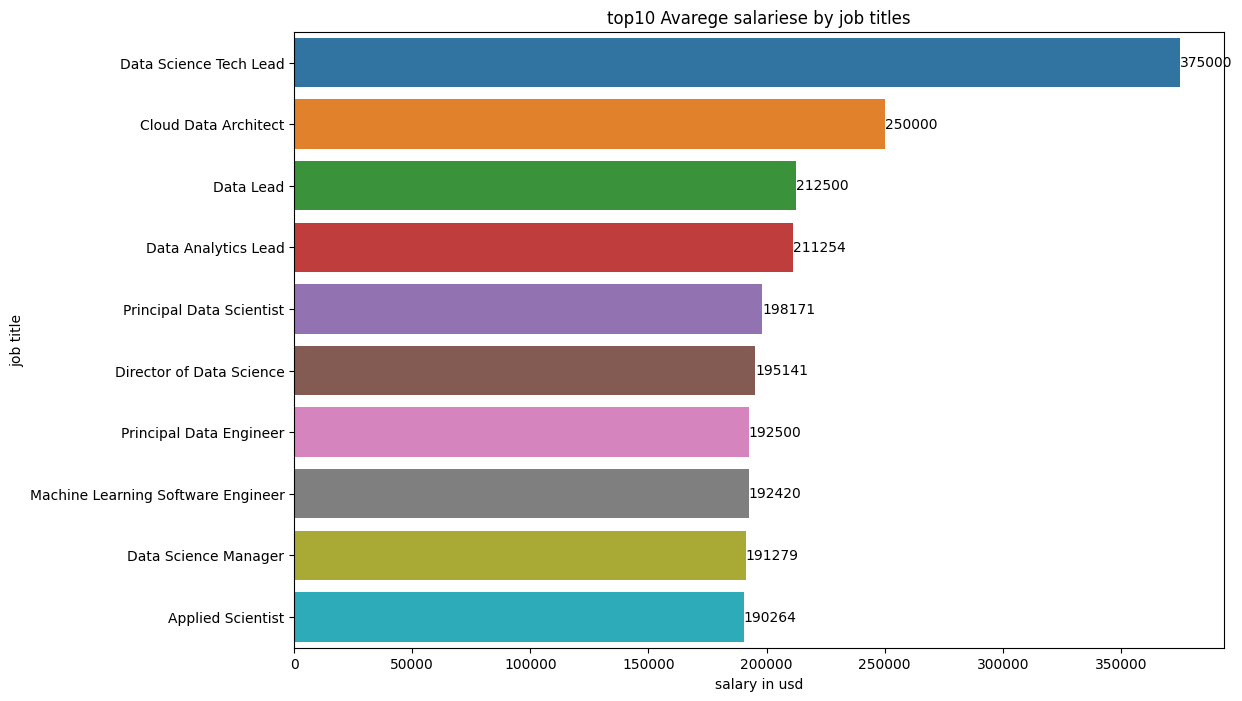

In [30]:
plt.figure(facecolor="white",figsize=(12,8))
ax = sns.barplot(data= job_title_salary, y = "job_title", x = "salary_in_usd")
ax.set(ylabel='job title', xlabel= 'salary in usd', title= 'top10 Avarege salariese by job titles')
ax.bar_label(ax.containers[0])
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

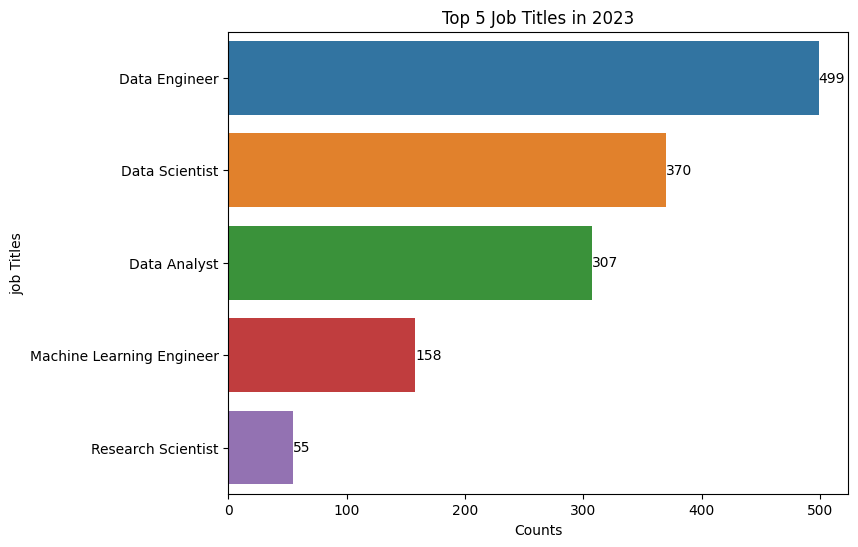

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

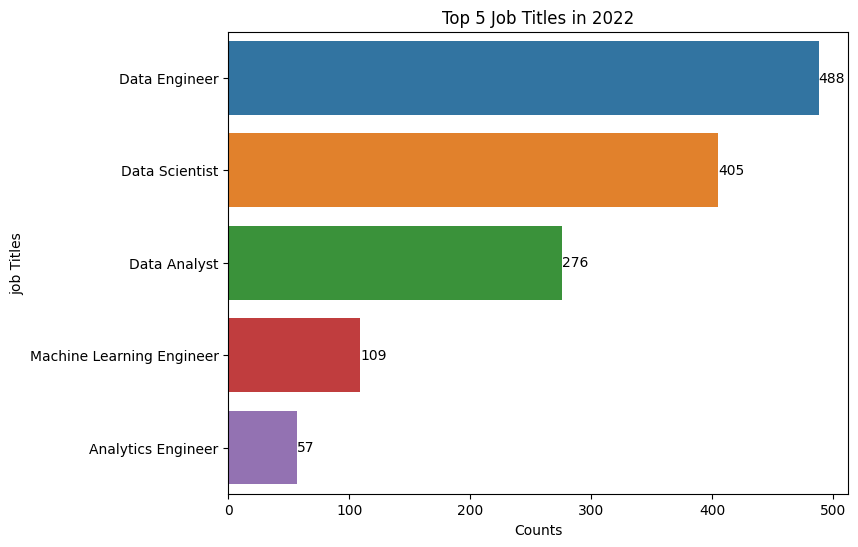

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

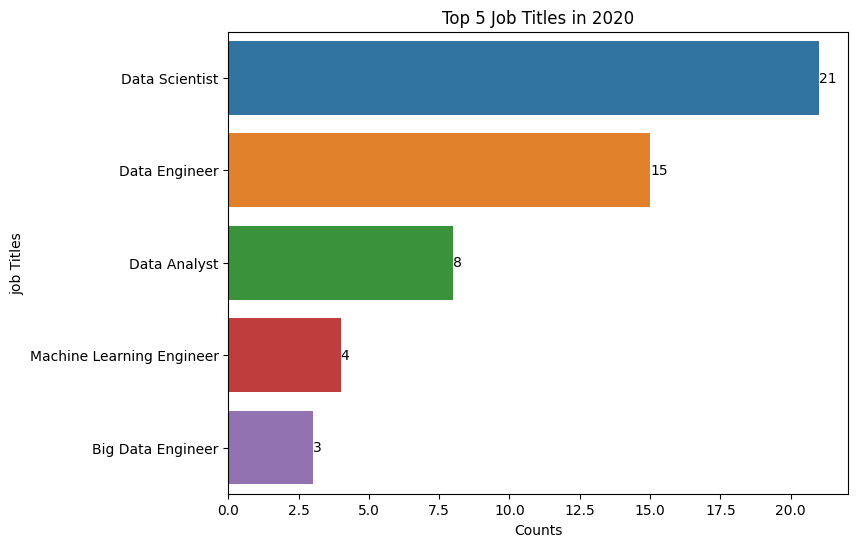

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

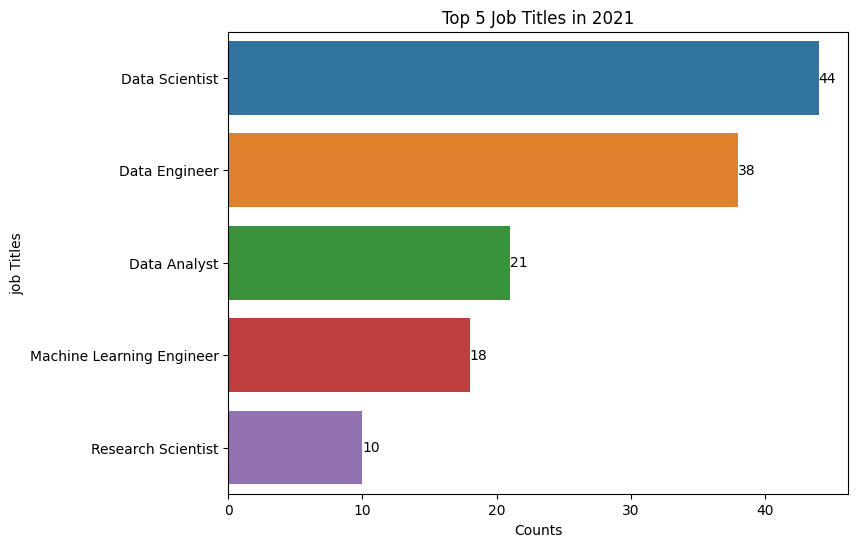

In [31]:
for i in data["work_year"].unique():
    plt.figure(figsize=(8,6))
    ax = sns.barplot(y = data[data['work_year']==i]['job_title'].value_counts().nlargest().index,
                     x = data[data['work_year']==i]['job_title'].value_counts().nlargest())
    ax.set(ylabel= 'job Titles', xlabel='Counts', title=f'Top 5 Job Titles in {i}')
    ax.bar_label(ax.containers[0])
    plt.show()                 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<function matplotlib.pyplot.show(close=None, block=None)>

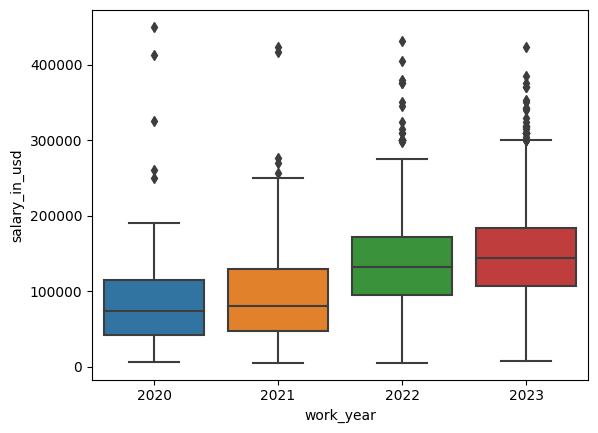

In [32]:
sns.boxplot(x = 'work_year', y = 'salary_in_usd', data = data, )
plt.show

In [33]:
top_company = data['company_location'].value_counts().nlargest(10).index.tolist()
top_company

['US', 'GB', 'CA', 'ES', 'IN', 'DE', 'FR', 'BR', 'AU', 'GR']

In [34]:
data_top_company = data[data['company_location'].isin(top_company)]
data_top_company.head(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,Senior-level,Full-time,Principal Data Scientist,80000,EUR,85847,ES,100,ES,Large
1,2023,MI,Contract,ML Engineer,30000,USD,30000,US,100,US,Small
2,2023,MI,Contract,ML Engineer,25500,USD,25500,US,100,US,Small
3,2023,Senior-level,Full-time,Data Scientist,175000,USD,175000,CA,100,CA,Medium
4,2023,Senior-level,Full-time,Data Scientist,120000,USD,120000,CA,100,CA,Medium


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

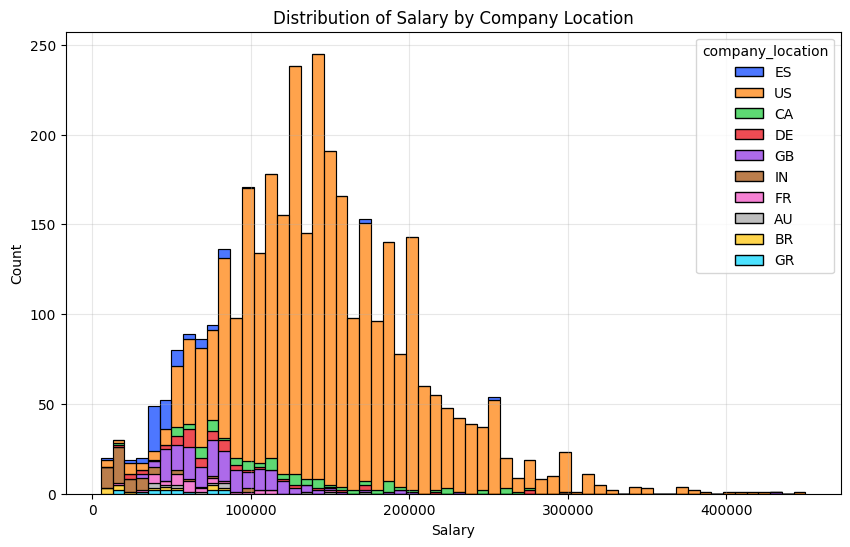

In [35]:
plt.figure(facecolor = "white",figsize = (10, 6))

sns.histplot(x = 'salary_in_usd', hue = 'company_location', multiple = 'stack', alpha = 0.7,
             bins = 60, data = data_top_company, palette = 'bright')

plt.grid(alpha = 0.3)
plt.title('Distribution of Salary by Company Location')
plt.xlabel('Salary')
plt.ylabel('Count')
plt.show()

In [36]:
data_top_jobs = data['job_title'].value_counts().nlargest(10).index.tolist()
print(data_top_jobs)

['Data Engineer', 'Data Scientist', 'Data Analyst', 'Machine Learning Engineer', 'Analytics Engineer', 'Data Architect', 'Research Scientist', 'Data Science Manager', 'Applied Scientist', 'Research Engineer']


In [37]:
data_top_jobs = data[data['job_title'].isin(data_top_jobs)]
data_top_jobs.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
3,2023,Senior-level,Full-time,Data Scientist,175000,USD,175000,CA,100,CA,Medium
4,2023,Senior-level,Full-time,Data Scientist,120000,USD,120000,CA,100,CA,Medium
5,2023,Senior-level,Full-time,Applied Scientist,222200,USD,222200,US,0,US,Large
6,2023,Senior-level,Full-time,Applied Scientist,136000,USD,136000,US,0,US,Large
7,2023,Senior-level,Full-time,Data Scientist,219000,USD,219000,CA,0,CA,Medium


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

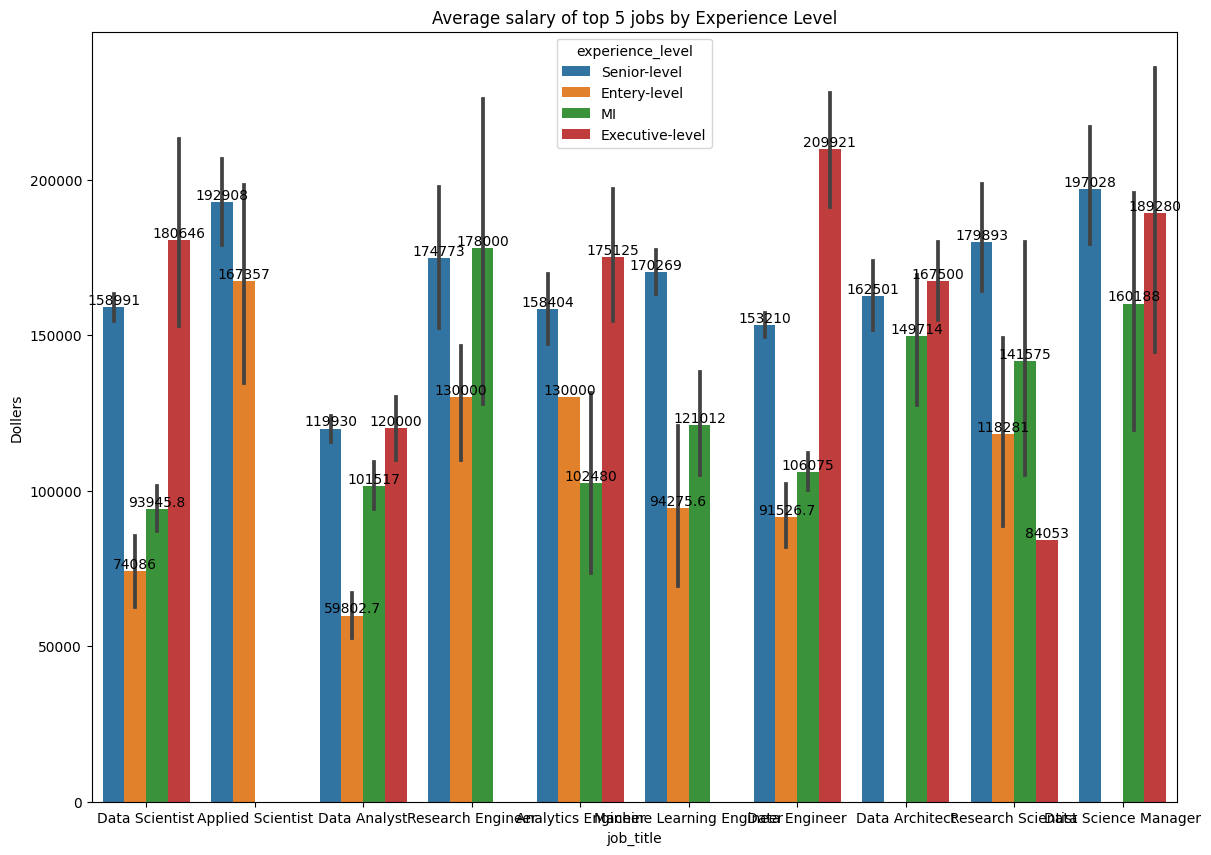

In [38]:
plt.figure(facecolor = "white",figsize = (14, 10))
ax = sns.barplot(data = data_top_jobs, x = 'job_title', y = 'salary_in_usd', hue = 'experience_level')
ax.set(xlabel = 'job_title', ylabel= 'Dollers', title= 'Average salary of top 5 jobs by Experience Level')

for j in [0,1,2,3]:
    ax.bar_label(ax.containers[j])

plt.show()

In [39]:
data['company_size']

0        Large
1        Small
2        Small
3       Medium
4       Medium
         ...  
3750     Large
3751     Large
3752     Small
3753     Large
3754     Large
Name: company_size, Length: 3755, dtype: object

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

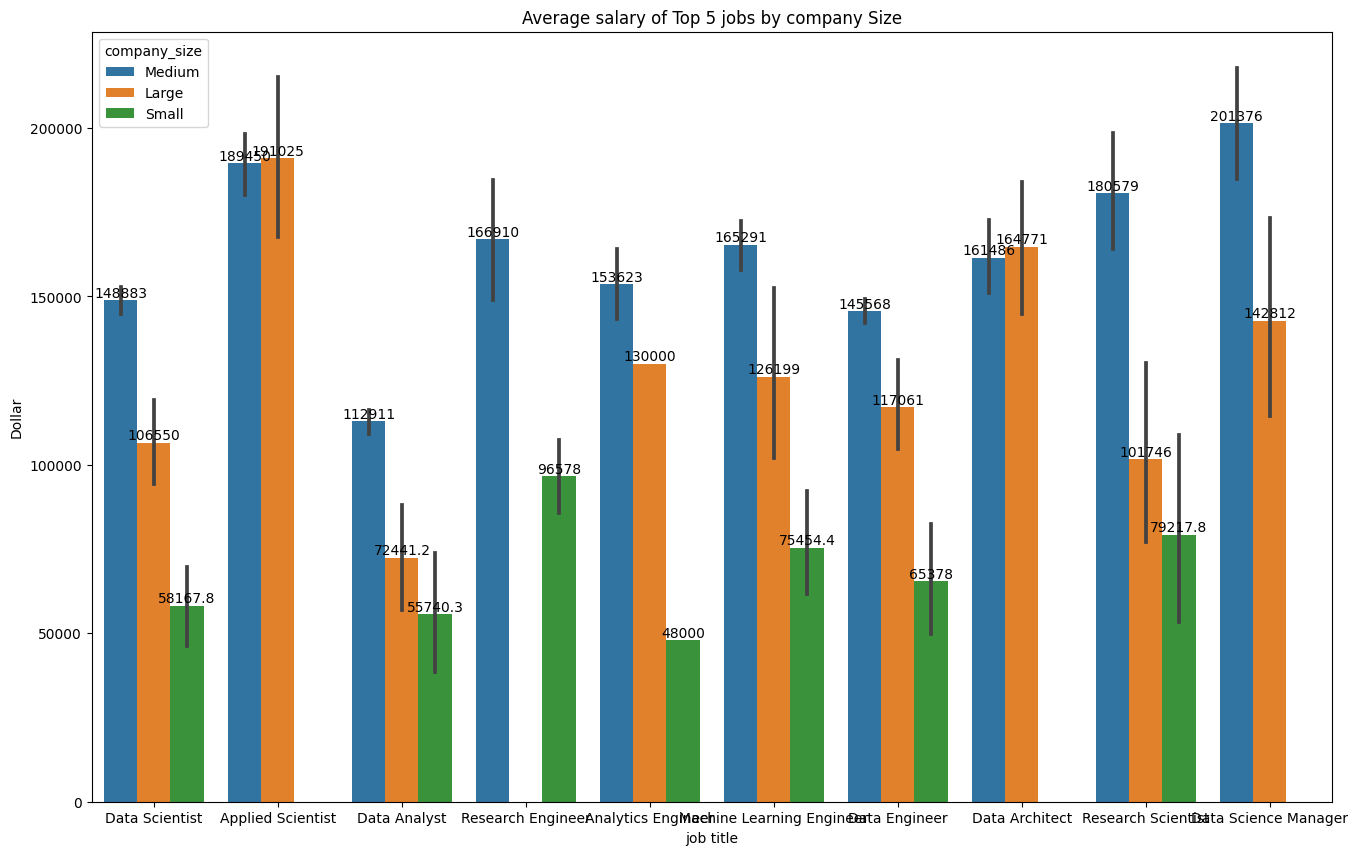

In [40]:
plt.figure(facecolor = "white", figsize =(16,10))
ax = sns.barplot(data = data_top_jobs, x = 'job_title',y = 'salary_in_usd', hue = 'company_size')
ax.set(xlabel = 'job title', ylabel = 'Dollar', title = 'Average salary of Top 5 jobs by company Size')

for j in [0,1,2]:
    ax.bar_label(ax.containers[j])
plt.show()    

In [41]:
data_remote = data.groupby('remote_ratio')['salary_in_usd'].mean().round(0).reset_index()
print(data_remote)

   remote_ratio  salary_in_usd
0             0       144316.0
1            50        78401.0
2           100       136481.0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

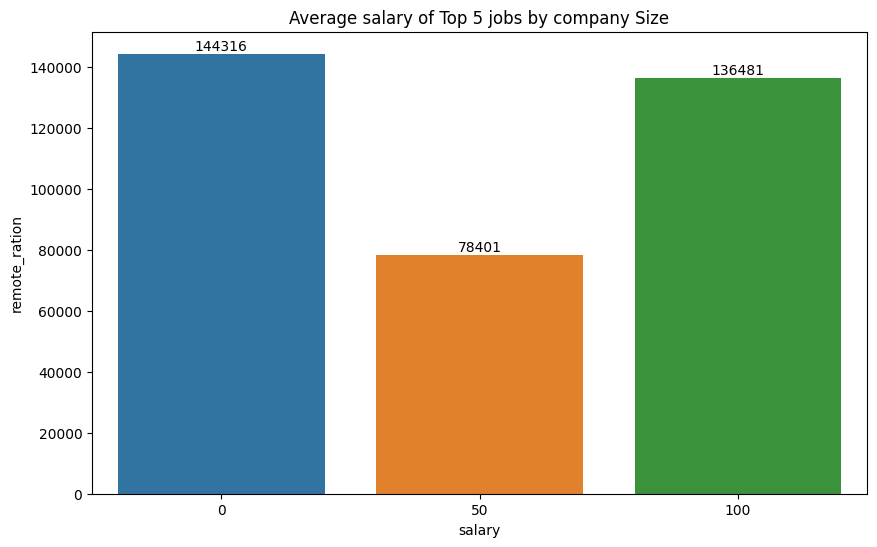

In [42]:
plt.figure(facecolor = "white", figsize =(10,6))
ax = sns.barplot(data = data_remote, x = 'remote_ratio',y = 'salary_in_usd')
ax.set(xlabel = 'salary', ylabel = 'remote_ration', title = 'Average salary of Top 5 jobs by company Size')

ax.bar_label(ax.containers[0])
plt.show()    